In [1]:
import importlib
import universe
importlib.reload(universe)
from universe import *

import halo_fit
importlib.reload(halo_fit)
from halo_fit import *

import weight
importlib.reload(weight)
from weight import *

import pn_2d
importlib.reload(pn_2d)
from pn_2d import *

import cmb
importlib.reload(cmb)
from cmb import *

import flat_map
importlib.reload(flat_map)
from flat_map import *

In [2]:
print("Map properties")

# number of pixels for the flat map
nX = 400 #1200
nY = 400 #1200

# map dimensions in degrees
sizeX = 10.
sizeY = 10.

# basic map object
baseMap = FlatMap(nX=nX, nY=nY, sizeX=sizeX*np.pi/180., sizeY=sizeY*np.pi/180.)

# multipoles to include in the lensing reconstruction
lMin = 30.; lMax = 3.5e3

# ell bins for power spectra
nBins = 21  # number of bins
lRange = (1., 2.*lMax)  # range for power spectra

Map properties


In [3]:
print("CMB experiment properties")

# Adjust the lMin and lMax to the assumptions of the analysis
# CMB S3 specs
cmb = StageIVCMB(beam=1., noise=1., lMin=lMin, lMaxT=lMax, lMaxP=lMax, atm=False)

# Total power spectrum, for the lens reconstruction
forCtotal = lambda l: cmb.flensedTT(l) + cmb.fdetectorNoise(l)
#
# reinterpolate: gain factor 10 in speed
L = np.logspace(np.log10(lMin/2.), np.log10(2.*lMax), 1001, 10.)
F = np.array(list(map(forCtotal, L)))
cmb.fCtotal = interp1d(L, F, kind='linear', bounds_error=False, fill_value=0.)

CMB experiment properties


In [4]:
print("CMB lensing power spectrum")

u = UnivPlanck15()
halofit = Halofit(u, save=False)
w_cmblens = WeightLensSingle(u, z_source=1100., name="cmblens")
p2d_cmblens = P2dAuto(u, halofit, w_cmblens, save=False)

CMB lensing power spectrum


In [5]:
print("Compute the statistical uncertainty on the reconstructed lensing convergence")

print("- standard quadratic estimator")
fNqCmb_fft = baseMap.forecastN0Kappa(cmb.funlensedTT, cmb.fCtotal, lMin=lMin, lMax=lMax, test=False)
print("- magnification estimator")
fNdCmb_fft = baseMap.forecastN0KappaDilation(cmb.funlensedTT, cmb.fCtotal, lMin=lMin, lMax=lMax, corr=True, test=False)
print("- shear E-mode estimator")
fNsCmb_fft = baseMap.forecastN0KappaShear(cmb.funlensedTT, cmb.fCtotal, lMin=lMin, lMax=lMax, corr=True, test=False)
#print("- shear B-mode estimator"
#fNsBCmb_fft = baseMap.forecastN0KappaShearB(cmb.funlensedTT, cmb.fCtotal, lMin=lMin, lMax=lMax, corr=True, test=False)
#print("- shear E x magnification"
#fNsdCmb_fft = baseMap.forecastN0KappaShearDilation(cmb.funlensedTT, cmb.fCtotal, lMin=lMin, lMaxS=lMax, lMaxD=lMax, corr=True, test=False)
#print("- shear E x shear B. Not yet working."
#fNssBCmb_fft = baseMap.forecastN0KappaShearShearB(cmb.funlensedTT, cmb.fCtotal, lMin=lMin, lMax=lMax, corr=True, test=False)

Compute the statistical uncertainty on the reconstructed lensing convergence
- standard quadratic estimator
computing the reconstruction noise
Doing full calculation: computeQuadEstPhiNormalizationFFT


flat_map.py:1655: RuntimeWarning: divide by zero encountered in divide
  resultFourier = 1./resultFourier
flat_map.py:1655: RuntimeWarning: invalid value encountered in divide
  resultFourier = 1./resultFourier


- magnification estimator
computing the reconstruction noise
doing full calculation: computeQuadEstPhiDilationNormalizationCorrectedFFT


cmb.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  self.fdl_to_cl = lambda l: 1./( l*(l+1.)/(2.*np.pi) )
cmb.py:42: RuntimeWarning: invalid value encountered in double_scalars
  self.funlensedTT = lambda l: (l>=lmin_unlensedCMB and l<=lmax_unlensedCMB) * self.funlensedTT_template(l) * self.fdl_to_cl(l)
flat_map.py:2527: RuntimeWarning: divide by zero encountered in divide
  term1XFourier *= 2. * self.lx / self.l**2 / 1.j # factor of i to cancel the one in the gradient
flat_map.py:2527: RuntimeWarning: invalid value encountered in divide
  term1XFourier *= 2. * self.lx / self.l**2 / 1.j # factor of i to cancel the one in the gradient
flat_map.py:2531: RuntimeWarning: divide by zero encountered in divide
  term1YFourier *= 2. * self.ly / self.l**2 / 1.j # factor of i to cancel the one in the gradient
flat_map.py:2531: RuntimeWarning: invalid value encountered in divide
  term1YFourier *= 2. * self.ly / self.l**2 / 1.j # factor of i to cancel the one in the gradient

- shear E-mode estimator
computing the reconstruction noise
doing full calculation: computeQuadEstPhiShearNormalizationCorrectedFFT


flat_map.py:3051: RuntimeWarning: divide by zero encountered in divide
  cosXFourier = shearFourier * (self.lx**2 - self.ly**2) / self.l**2
flat_map.py:3051: RuntimeWarning: invalid value encountered in divide
  cosXFourier = shearFourier * (self.lx**2 - self.ly**2) / self.l**2
flat_map.py:3055: RuntimeWarning: divide by zero encountered in divide
  cosYFourier = shearFourier * self.lx * self.ly / self.l**2
flat_map.py:3055: RuntimeWarning: invalid value encountered in divide
  cosYFourier = shearFourier * self.lx * self.ly / self.l**2
flat_map.py:3076: RuntimeWarning: invalid value encountered in divide
  grad1XcosXFourier *= 2. * self.lx / 1.j / self.l**4 # for grad
flat_map.py:3081: RuntimeWarning: invalid value encountered in divide
  grad1YcosXFourier *= 2. * self.ly / 1.j / self.l**4 # for grad
flat_map.py:3086: RuntimeWarning: invalid value encountered in divide
  grad1XcosYFourier *= 2. * self.lx / 1.j / self.l**4 # for grad
flat_map.py:3091: RuntimeWarning: invalid value encou

In [6]:
# colors for plots
cQ = 'r'
cS = 'b'
cD = 'g'

Plot noise power spectra


/Users/eschaan/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/eschaan/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


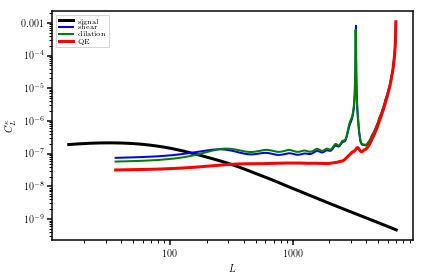

In [7]:
print("Plot noise power spectra")

fig=plt.figure(0)
ax=fig.add_subplot(111)
#
ax.loglog(L, p2d_cmblens.fPinterp(L), 'k-', lw=3, label=r'signal')
#
Nq = fNqCmb_fft(L)
Ns = fNsCmb_fft(L)
Nd = fNdCmb_fft(L)
#Nsd = fNsdCmb_fft(L)
#NsB = fNsBCmb_fft(L)
#NssB = fNssBCmb_fft(L)
#
ax.loglog(L, Ns, c=cS, label=r'shear')
ax.loglog(L, Nd, c=cD, label=r'dilation')
ax.loglog(L, Nq, c=cQ, lw=3, label=r'QE')
#ax.loglog(L, NsB, c='y', label=r'shear B')a
#x.loglog(L, Nsd, c='c', ls='--', label=r'shear$\times$dilation')
#ax.loglog(L, 1./(1./Nd + 1./Ns), c=cQ, ls='-.', label=r'naive shear + dilation')
#ax.loglog(L, (Ns*Nd-Nsd**2)/(Ns+Nd-2.*Nsd), c=cQ, ls='--', lw=3, label=r'shear + dilation')
#ax.loglog(L, NssB, c='y', ls='-.', label=r'shear$\times$shear B')
#
ax.legend(loc=2, fontsize='x-small', labelspacing=0.1)
ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$C_L^\kappa$')

plt.show()

Generate GRF unlensed CMB map (debeamed)
plot unlensed CMB map


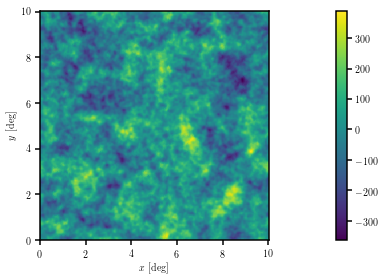

check the power spectrum


flat_map.py:453: RuntimeWarning: invalid value encountered in divide
  sCl /= np.sqrt(Nmodes)


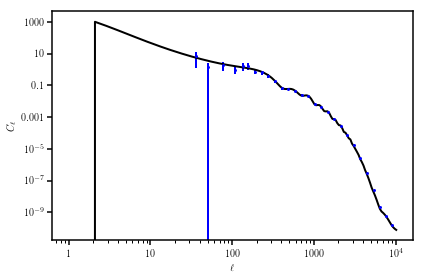

In [8]:
print("Generate GRF unlensed CMB map (debeamed)")

cmb0Fourier = baseMap.genGRF(cmb.funlensedTT, test=False)
cmb0 = baseMap.inverseFourier(cmb0Fourier)
print("plot unlensed CMB map")
baseMap.plot(cmb0)
print("check the power spectrum")
lCen, Cl, sCl = baseMap.powerSpectrum(cmb0Fourier, theory=[cmb.funlensedTT], plot=True, save=False)

Generate GRF kappa map
plot kappa map


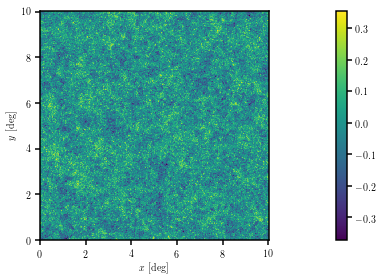

check the power spectrum


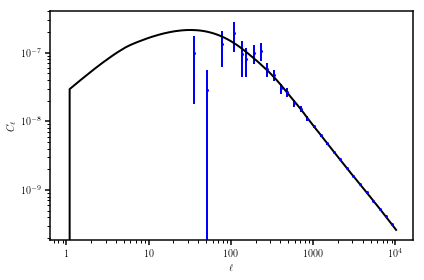

In [9]:
print("Generate GRF kappa map")

kCmbFourier = baseMap.genGRF(p2d_cmblens.fPinterp, test=False)
kCmb = baseMap.inverseFourier(kCmbFourier)
print("plot kappa map")
baseMap.plot(kCmb)
print("check the power spectrum")
lCen, Cl, sCl = baseMap.powerSpectrum(kCmbFourier, theory=[p2d_cmblens.fPinterp], plot=True, save=False)

Lens the CMB map


flat_map.py:1195: RuntimeWarning: invalid value encountered in divide
  dxFourier = -2.j * self.lx/self.l**2 * kappaFourier
flat_map.py:1196: RuntimeWarning: invalid value encountered in divide
  dyFourier = -2.j * self.ly/self.l**2 * kappaFourier


plot lensed CMB map


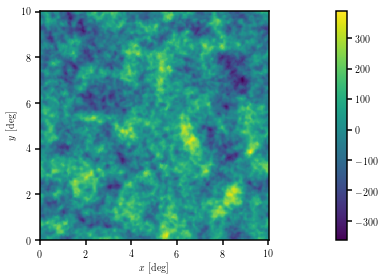

check the power spectrum


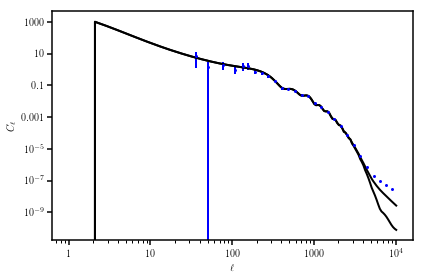

In [10]:
print("Lens the CMB map")

lensedCmb = baseMap.doLensing(cmb0, kappaFourier=kCmbFourier)
lensedCmbFourier = baseMap.fourier(lensedCmb)
print("plot lensed CMB map")
baseMap.plot(lensedCmb, save=False)
print("check the power spectrum")
lCen, Cl, sCl = baseMap.powerSpectrum(lensedCmbFourier, theory=[cmb.funlensedTT, cmb.flensedTT], plot=True, save=False)

Add white detector noise (debeamed)


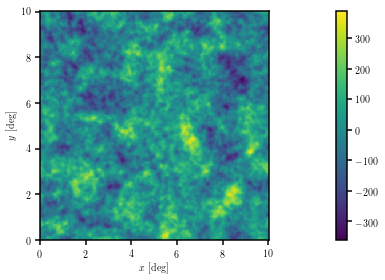

check the power spectrum


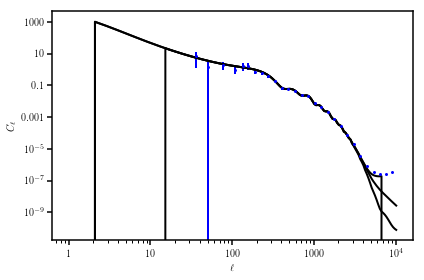

In [11]:
print("Add white detector noise (debeamed)")

noiseFourier = baseMap.genGRF(cmb.fdetectorNoise, test=False)
totalCmbFourier = lensedCmbFourier + noiseFourier
totalCmb = baseMap.inverseFourier(totalCmbFourier)
baseMap.plot(totalCmb)
print("check the power spectrum")
lCen, Cl, sCl = baseMap.powerSpectrum(totalCmbFourier,theory=[cmb.funlensedTT, cmb.flensedTT, cmb.fCtotal], plot=True, save=False)

Reconstructing kappa: standard quadratic estimator
Doing full calculation: computeQuadEstPhiNormalizationFFT
saving Fourier map to ./output/qCmb.txt
reading fourier map from ./output/qCmb.txt
Auto-power: kappa_rec


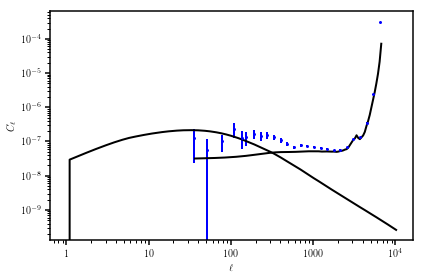

Cross-power: kappa_rec x kappa_true


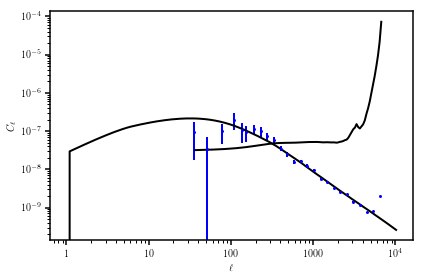

In [12]:
print("Reconstructing kappa: standard quadratic estimator")

pathQCmb = "./output/qCmb.txt"
baseMap.computeQuadEstKappaNorm(cmb.funlensedTT, cmb.fCtotal, lMin=lMin, lMax=lMax, dataFourier=totalCmbFourier, test=False, path=pathQCmb)
qCmbFourier = baseMap.loadDataFourier(pathQCmb)

print("Auto-power: kappa_rec")
lCen, Cl, sCl = baseMap.powerSpectrum(qCmbFourier,theory=[p2d_cmblens.fPinterp, fNqCmb_fft], plot=True, save=False)

print("Cross-power: kappa_rec x kappa_true")
lCen, Cl, sCl = baseMap.crossPowerSpectrum(qCmbFourier, kCmbFourier, theory=[p2d_cmblens.fPinterp, fNqCmb_fft], plot=True, save=False)

In [13]:
print("Reconstructing kappa: shear estimator")

pathSCmb = "./output/sCmb.txt"
baseMap.computeQuadEstKappaShearNormCorr(cmb.funlensedTT, cmb.fCtotal, lMin=lMin, lMax=lMax, dataFourier=totalCmbFourier, test=False, path=pathSCmb)
sCmbFourier = baseMap.loadDataFourier(pathSCmb)

Reconstructing kappa: shear estimator


flat_map.py:2951: RuntimeWarning: divide by zero encountered in divide
  resultFourier *= -2. / self.l**2
flat_map.py:2951: RuntimeWarning: invalid value encountered in multiply
  resultFourier *= -2. / self.l**2


doing full calculation: computeQuadEstPhiShearNormalizationCorrectedFFT
saving Fourier map to ./output/sCmb.txt
reading fourier map from ./output/sCmb.txt


Auto-power: kappa_rec


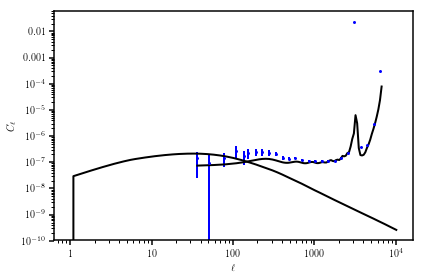

In [14]:
print("Auto-power: kappa_rec")
lCen, Cl, sCl = baseMap.powerSpectrum(sCmbFourier,theory=[p2d_cmblens.fPinterp, fNsCmb_fft], plot=True, save=False)

Cross-power: kappa_rec x kappa_true


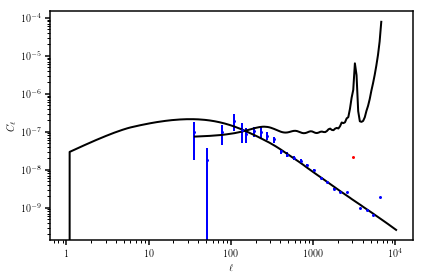

In [15]:
print("Cross-power: kappa_rec x kappa_true")
lCen, Cl, sCl = baseMap.crossPowerSpectrum(sCmbFourier, kCmbFourier, theory=[p2d_cmblens.fPinterp, fNsCmb_fft], plot=True, save=False)

In [16]:
print("Reconstructing kappa: magnification estimator")

pathDCmb = "./output/dCmb.txt"
baseMap.computeQuadEstKappaDilationNormCorr(cmb.funlensedTT, cmb.fCtotal, lMin=lMin, lMax=lMax, dataFourier=totalCmbFourier, test=False, path=pathDCmb)
dCmbFourier = baseMap.loadDataFourier(pathDCmb)

Reconstructing kappa: magnification estimator


flat_map.py:2405: RuntimeWarning: divide by zero encountered in divide
  productFourier *= - 2. / self.l**2
flat_map.py:2405: RuntimeWarning: invalid value encountered in multiply
  productFourier *= - 2. / self.l**2


doing full calculation: computeQuadEstPhiDilationNormalizationCorrectedFFT
saving Fourier map to ./output/dCmb.txt
reading fourier map from ./output/dCmb.txt


Auto-power: kappa_rec


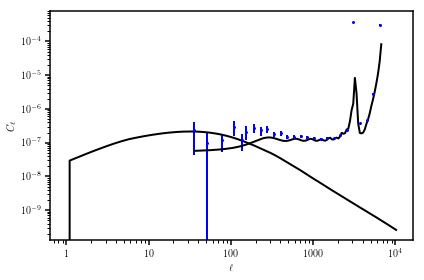

In [17]:
print("Auto-power: kappa_rec")
lCen, Cl, sCl = baseMap.powerSpectrum(dCmbFourier,theory=[p2d_cmblens.fPinterp, fNdCmb_fft], plot=True, save=False)

Cross-power: kappa_rec x kappa_true


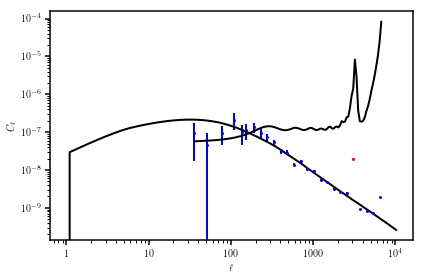

In [18]:
print("Cross-power: kappa_rec x kappa_true")
lCen, Cl, sCl = baseMap.crossPowerSpectrum(dCmbFourier, kCmbFourier, theory=[p2d_cmblens.fPinterp, fNdCmb_fft], plot=True, save=False)